### Importing Necassary Libraries

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
books=pd.read_csv("books.csv")
books.head()

,Sr. No,Acc. Date,Acc. No.,Author,Title,Ed.,Vol.,ISBN,Pgs.,Pub. Place,Pub.,Copyright Year,Call No.,Vendor,Invoice date,Invoice No.,Price,Location,Dept.,Language
0,1,06.05.2008,SIT-B-1,V.R. Gowariker,Polymer science,NaN,NaN,9780852263075,"xv,505",New Delhi,New Age International (P) Limited,2003.0,668.9/GOW,World Book Distributors,18.10.2013,NaN,195.0,NaN,Civil Engineering,English
1,2,06.05.2008,SIT-B-2,Yunus A. Cengel,Thermodynamics an engineering approach,5,NaN,9780070606593,946,New Delhi,Tata McGarawhill publishing,2006.0,621.4021/CEN,World Book Distributors,18.10.2013,NaN,399.0,GEN,Mechanical Engineering,English
2,3,05.12.2013,SIT-B-3,Toro Vincent Del,Electrical engineering fundamentals,2nd,NaN,NaN,921,New Delhi,PHI,1986.0,621.3/TOR,NaN,05.12.2013,NaN,NaN,NaN,E and Tc Engineering,English
3,4,06.05.2008,SIT-B-4,Vincent Del Toro,Electrical engineering fundamentals,2,NaN,9788120305991,921,New Delhi,Printice Hall of India,1986.0,621.3/ TOR,World Book Distributors,18.10.2013,NaN,350.0,NaN,E and Tc Engineering,English
4,5,06.05.2008,SIT-B-5,Albert D. Helfrick,Modern electornic instumentation and measurmen...,NaN,NaN,NaN,414,New Delhi,Pearson Education,2008.0,621.37/HEL,World Book Distributors,18.10.2013,NaN,195.0,NaN,E and Tc Engineering,English


In [ ]:
df=pd.read_csv('issue renew.csv')
df.head()

,Cardnumber,Title,Author,Barcode,type,itype,IssueDate,Library,Collection
0,21070122199,Polymer science,V.R. Gowariker,SIT-B-1,issue,B,2022-06-18 09:32:01,SIT,NaN
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,SIT-B-2,issue,B,2022-10-31 15:03:30,SIT,NaN
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,SIT-B-2,renew,B,2022-11-28 10:03:04,SIT,NaN
3,21070126058,Building drawing : with an integrated approacc...,M.G. Shah,SIT-B-7,issue,B,2022-06-17 09:34:54,SIT,NaN
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,SIT-B-9,issue,B,2022-08-06 12:23:06,SIT,NaN


### Data Pre-Processing

In [ ]:
df.shape

(5693, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5693 entries, 0 to 5692
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Cardnumber  5693 non-null   object
 1   Title       5693 non-null   object
 2   Author      5110 non-null   object
 3   Barcode     5693 non-null   object
 4   type        5693 non-null   object
 5   itype       5693 non-null   object
 6   IssueDate   5693 non-null   object
 7   Library     5693 non-null   object
 8   Collection  348 non-null    object
dtypes: object(9)
memory usage: 400.4+ KB


In [ ]:
df.describe()

,Cardnumber,Title,Author,Barcode,type,itype,IssueDate,Library,Collection
count,5693,5693,5110,5693,5693,5693,5693,5693,348
unique,1004,1226,1089,2898,2,2,5453,1,7
top,21070122165,Higher engineering mathematics,"Jain, P.C.",SIT-B-15296,issue,B,2022-11-18 13:22:51,SIT,GEN
freq,36,223,143,9,4515,5687,7,5693,172


In [ ]:
df.isnull().sum()

Cardnumber       0
Title            0
Author         583
Barcode          0
type             0
itype            0
IssueDate        0
Library          0
Collection    5345
dtype: int64

In [ ]:
duplicate_titles = df['Title'].value_counts()
duplicate_titles = duplicate_titles[duplicate_titles > 1].reset_index()
duplicate_titles.columns = ['Title', 'Count']

In [ ]:
duplicate_titles

,Title,Count
0,Higher engineering mathematics,223
1,Engineering chemistry,187
2,Digital signal processing,122
3,Fundamentals of digital circuits,85
4,A textbook of engineering physics,83
...,...,...
687,How to Prepare for Logical Reasoning CAT,2
688,Engineering mechanics statics and dynamics,2
689,Introduction to Computational Fluid Dynamics :...,2
690,Concepts of Physics : Vol. 1,2


In [ ]:
df.drop(['Collection', 'Barcode', 'itype', 'Library'], axis=1,inplace=True)
df.head(2)

,Cardnumber,Title,Author,type,IssueDate
0,21070122199,Polymer science,V.R. Gowariker,issue,2022-06-18 09:32:01
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,2022-10-31 15:03:30


In [ ]:
merged_df = pd.merge(df, duplicate_titles, on='Title', how='left')
merged_df.head()

,Cardnumber,Title,Author,type,IssueDate,Count
0,21070122199,Polymer science,V.R. Gowariker,issue,2022-06-18 09:32:01,NaN
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,2022-10-31 15:03:30,4.0
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,2022-11-28 10:03:04,4.0
3,21070126058,Building drawing : with an integrated approacc...,M.G. Shah,issue,2022-06-17 09:34:54,NaN
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2022-08-06 12:23:06,18.0


In [ ]:
merged_df.dropna()

,Cardnumber,Title,Author,type,IssueDate,Count
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,2022-10-31 15:03:30,4.0
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,2022-11-28 10:03:04,4.0
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2022-08-06 12:23:06,18.0
5,21070123002,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2023-01-10 15:54:27,18.0
6,21070123050,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2023-01-18 14:28:28,18.0
...,...,...,...,...,...,...
5681,20070122205,Artificial Intelligence: Making a system intel...,"Jain, Nilakshi",renew,2022-10-13 11:55:05,4.0
5682,21070127028,Artificial Intelligence: Making a system intel...,"Jain, Nilakshi",issue,2022-09-05 15:07:14,4.0
5683,22070149023,Artificial Intelligence: Making a system intel...,"Jain, Nilakshi",issue,2022-09-21 16:18:06,4.0
5685,21070123016,Industrial Ergonomics,"Khan, M. I.",issue,2023-01-02 14:21:58,2.0


In [ ]:
merged_df.isna().sum()

Cardnumber      0
Title           0
Author        583
type            0
IssueDate       0
Count         534
dtype: int64

In [ ]:
def convert_to_rating(Count):
    if Count >50:
        return 5
    elif Count >30:
        return 4
    elif Count > 10:
        return 3
    elif Count > 3:
        return 2
    else:
        return 1

# Add a new column to the dataset with the book ratings
merged_df['Rating'] = merged_df['Count'].apply(convert_to_rating)


### Merging the dept column from books to issue data

In [ ]:
dept= dict(zip(books['Title'], books['Dept.']))
dept

{'Polymer science': 'Civil Engineering',
 'Thermodynamics an engineering approach': 'Mechanical Engineering',
 'Electrical engineering fundamentals': 'E and Tc Engineering',
 'Modern electornic instumentation and measurment techniques': 'E and Tc Engineering',
 'Modern electrnic instumentation and measurment techniques': 'E and Tc Engineering',
 'Building drawing : with an integrated approacch to built environment': 'Civil Engineering',
 'Op-Ams and linear integrated circuits': 'E and Tc Engineering',
 'Elecronic devices and circuits an introduction': 'E and Tc Engineering',
 'Electronic devices and circuit theory': 'E and Tc Engineering',
 'Integrat Elecetronic Analog and Digital Circuits': 'E and Tc Engineering',
 'Microelectronics': nan,
 'Control systems principles and design': 'Mechanical Engineering',
 'Modern control engineering': 'E and Tc Engineering',
 'Process control instrumentation technology': nan,
 'Discrete - time control sustems': 'Civil Engineering',
 'Modern digital 

In [ ]:
merged_df['Department'] = df.loc[:, 'Title']
merged_df.head()

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department
0,21070122199,Polymer science,V.R. Gowariker,issue,2022-06-18 09:32:01,NaN,1,Polymer science
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,2022-10-31 15:03:30,4.0,2,Thermodynamics an engineering approach
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,2022-11-28 10:03:04,4.0,2,Thermodynamics an engineering approach
3,21070126058,Building drawing : with an integrated approacc...,M.G. Shah,issue,2022-06-17 09:34:54,NaN,1,Building drawing : with an integrated approacc...
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2022-08-06 12:23:06,18.0,3,Op-Ams and linear integrated circuits


In [ ]:
merged_df['Department'] = merged_df['Department'].map(dept)
merged_df.head()

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department
0,21070122199,Polymer science,V.R. Gowariker,issue,2022-06-18 09:32:01,NaN,1,Civil Engineering
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,2022-10-31 15:03:30,4.0,2,Mechanical Engineering
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,2022-11-28 10:03:04,4.0,2,Mechanical Engineering
3,21070126058,Building drawing : with an integrated approacc...,M.G. Shah,issue,2022-06-17 09:34:54,NaN,1,Civil Engineering
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2022-08-06 12:23:06,18.0,3,E and Tc Engineering


In [ ]:
merged_df.Department.unique()

array(['Civil Engineering', 'Mechanical Engineering',
       'E and Tc Engineering', 'CS/ IT Engineering', 'Applied Science',
       nan, 'General', 'General Management', 'Social Science',
       'Mathematics', 'Other', 'Fiction', 'English', 'Hindi Fiction',
       'English Fiction', 'Management', 'Humanities and Social Science',
       'History', 'Autobiography', 'Psychology', 'Aptitude Test'],
      dtype=object)

In [ ]:
merged_df.loc[merged_df['Department'] == 'Other']

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department
473,20070121024,The Help,"Stockett, Kathryn",issue,2022-07-22 13:18:43,2.0,1,Other
474,20070121024,The Help,"Stockett, Kathryn",renew,2022-11-17 09:59:17,2.0,1,Other
475,21040342001,Smart thinking : how to think big innovate and...,Markman Art,issue,2022-07-25 16:02:30,NaN,1,Other
476,T00583,How I tought my Grandmother to read and other ...,Murty Sudha,issue,2023-01-18 14:18:32,NaN,1,Other
477,T00583,Grandma's bag of stories,Murty Sudha,issue,2023-01-18 14:19:27,NaN,1,Other
...,...,...,...,...,...,...,...,...
4898,22070127057,Mindset,Dweck Carol,renew,2023-01-16 11:58:56,12.0,3,Other
4899,22070122001,Don't Read This Book : Time Management for Cre...,Roos Donald,issue,2022-11-30 11:11:16,NaN,1,Other
4915,20070122041,Hooked:how to build habit foming products,"Eyal,Nir",issue,2022-10-13 12:19:11,3.0,1,Other
4916,20070122041,Hooked:how to build habit foming products,"Eyal,Nir",renew,2022-11-12 11:40:25,3.0,1,Other


### Merging the dept pages from books to issue data

In [ ]:
books['Pgs.'].isna().sum()

3745

In [ ]:
books['Pgs.'].fillna(100)

0        xv,505
1           946
2           921
3           921
4           414
          ...  
17431     x,418
17432     x,418
17433     x,418
17434     x,418
17435     x,418
Name: Pgs., Length: 17436, dtype: object

In [ ]:
books.dtypes

Sr. No              int64
Acc. Date          object
Acc. No.           object
Author             object
Title              object
Ed.                object
Vol.               object
ISBN               object
Pgs.               object
Pub. Place         object
Pub.               object
Copyright Year    float64
Call No.           object
Vendor             object
Invoice date       object
Invoice No.        object
Price             float64
Location           object
Dept.              object
Language           object
dtype: object

In [ ]:
books.head(2)

,Sr. No,Acc. Date,Acc. No.,Author,Title,Ed.,Vol.,ISBN,Pgs.,Pub. Place,Pub.,Copyright Year,Call No.,Vendor,Invoice date,Invoice No.,Price,Location,Dept.,Language
0,1,06.05.2008,SIT-B-1,V.R. Gowariker,Polymer science,NaN,NaN,9780852263075,"xv,505",New Delhi,New Age International (P) Limited,2003.0,668.9/GOW,World Book Distributors,18.10.2013,NaN,195.0,NaN,Civil Engineering,English
1,2,06.05.2008,SIT-B-2,Yunus A. Cengel,Thermodynamics an engineering approach,5,NaN,9780070606593,946,New Delhi,Tata McGarawhill publishing,2006.0,621.4021/CEN,World Book Distributors,18.10.2013,NaN,399.0,GEN,Mechanical Engineering,English


In [ ]:
for i, row in books.iterrows():
    try:
        books.at[i, 'Pgs.'] = int(row['Pgs.'])
    except ValueError:
        books.at[i, 'Pgs.'] = 0

In [ ]:
books.dtypes

Sr. No              int64
Acc. Date          object
Acc. No.           object
Author             object
Title              object
Ed.                object
Vol.               object
ISBN               object
Pgs.               object
Pub. Place         object
Pub.               object
Copyright Year    float64
Call No.           object
Vendor             object
Invoice date       object
Invoice No.        object
Price             float64
Location           object
Dept.              object
Language           object
dtype: object

In [ ]:
books['Pgs.'] = books['Pgs.'].astype(int)

In [ ]:
books.dtypes

Sr. No              int64
Acc. Date          object
Acc. No.           object
Author             object
Title              object
Ed.                object
Vol.               object
ISBN               object
Pgs.                int64
Pub. Place         object
Pub.               object
Copyright Year    float64
Call No.           object
Vendor             object
Invoice date       object
Invoice No.        object
Price             float64
Location           object
Dept.              object
Language           object
dtype: object

In [ ]:
books['Pgs.'].dtypes

dtype('int64')

In [ ]:
pages= dict(zip(books['Title'], books['Pgs.']))
pages

{'Polymer science': 339,
 'Thermodynamics an engineering approach': 946,
 'Electrical engineering fundamentals': 0,
 'Modern electornic instumentation and measurment techniques': 414,
 'Modern electrnic instumentation and measurment techniques': 414,
 'Building drawing : with an integrated approacch to built environment': 0,
 'Op-Ams and linear integrated circuits': 543,
 'Elecronic devices and circuits an introduction': 641,
 'Electronic devices and circuit theory': 0,
 'Integrat Elecetronic Analog and Digital Circuits': 0,
 'Microelectronics': 0,
 'Control systems principles and design': 971,
 'Modern control engineering': 904,
 'Process control instrumentation technology': 0,
 'Discrete - time control sustems': 0,
 'Modern digital electronics': 0,
 'Digital logic and computer design': 611,
 'Electronic Devices and Circuit': 0,
 'Basic VLSI Design': 459,
 'Electric machinery': 0,
 'Electrical machines drives and powers systems': 934,
 'Electronics communications': 820,
 'Communicatio

In [ ]:
merged_df['Pages'] = df.loc[:, 'Title']
merged_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department,Pages
0,21070122199,Polymer science,V.R. Gowariker,issue,2022-06-18 09:32:01,NaN,1,Civil Engineering,Polymer science
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,2022-10-31 15:03:30,4.0,2,Mechanical Engineering,Thermodynamics an engineering approach
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,2022-11-28 10:03:04,4.0,2,Mechanical Engineering,Thermodynamics an engineering approach
3,21070126058,Building drawing : with an integrated approacc...,M.G. Shah,issue,2022-06-17 09:34:54,NaN,1,Civil Engineering,Building drawing : with an integrated approacc...
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2022-08-06 12:23:06,18.0,3,E and Tc Engineering,Op-Ams and linear integrated circuits
...,...,...,...,...,...,...,...,...,...
5688,T07508,Electronics for you,NaN,issue,2022-07-12 11:00:32,3.0,1,NaN,Electronics for you
5689,T07508,Electronics for you,NaN,issue,2022-07-12 11:00:12,3.0,1,NaN,Electronics for you
5690,N01461,Readers Digest,NaN,issue,2022-08-04 09:20:50,NaN,1,NaN,Readers Digest
5691,N00819,ACI Structural Journal,Frosch Robert J. (ed),issue,2022-11-04 10:23:48,NaN,1,NaN,ACI Structural Journal


In [ ]:
merged_df['Pages'] = merged_df['Pages'].map(pages)
merged_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department,Pages
0,21070122199,Polymer science,V.R. Gowariker,issue,2022-06-18 09:32:01,NaN,1,Civil Engineering,339.0
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,2022-10-31 15:03:30,4.0,2,Mechanical Engineering,946.0
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,2022-11-28 10:03:04,4.0,2,Mechanical Engineering,946.0
3,21070126058,Building drawing : with an integrated approacc...,M.G. Shah,issue,2022-06-17 09:34:54,NaN,1,Civil Engineering,0.0
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2022-08-06 12:23:06,18.0,3,E and Tc Engineering,543.0
...,...,...,...,...,...,...,...,...,...
5688,T07508,Electronics for you,NaN,issue,2022-07-12 11:00:32,3.0,1,NaN,NaN
5689,T07508,Electronics for you,NaN,issue,2022-07-12 11:00:12,3.0,1,NaN,NaN
5690,N01461,Readers Digest,NaN,issue,2022-08-04 09:20:50,NaN,1,NaN,NaN
5691,N00819,ACI Structural Journal,Frosch Robert J. (ed),issue,2022-11-04 10:23:48,NaN,1,NaN,NaN


### EDA

<ipython-input-32-38b5a06d52ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['Rating'],ax=ax)


Text(0.5, 0, 'rating')

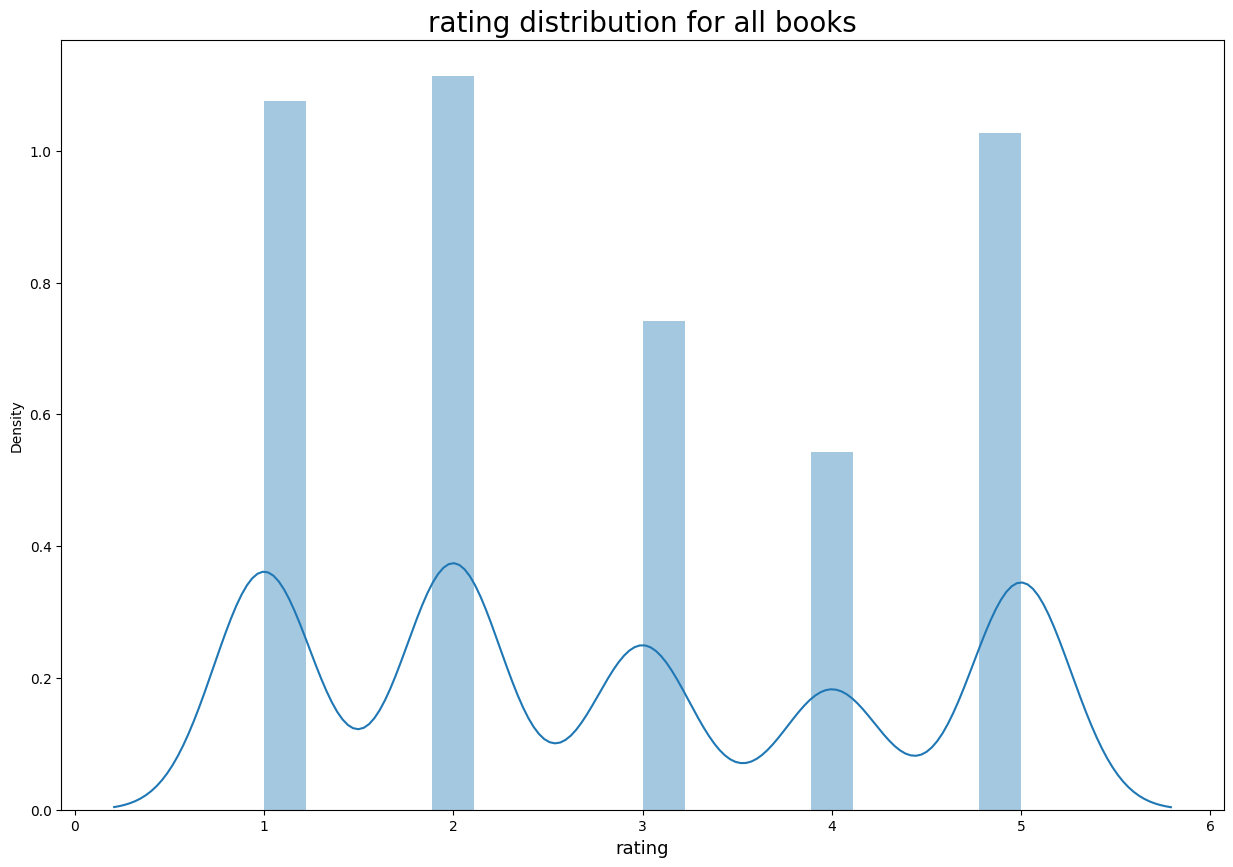

In [ ]:
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(merged_df['Rating'],ax=ax)
ax.set_title('rating distribution for all books',fontsize=20)
ax.set_xlabel('rating',fontsize=13)

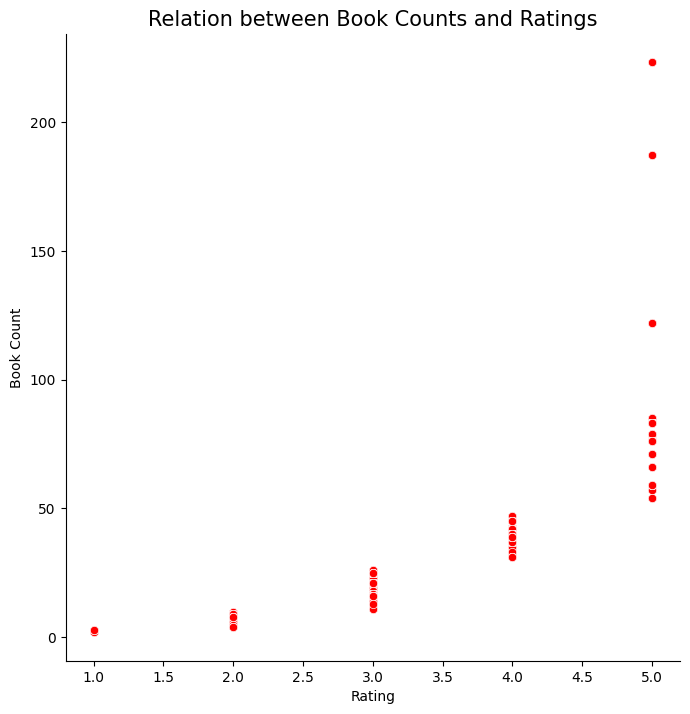

In [ ]:
ax = sns.relplot(data=merged_df, x="Rating", y="Count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Book Counts and Ratings",fontsize = 15)
ax.set_axis_labels("Rating", "Book Count")

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

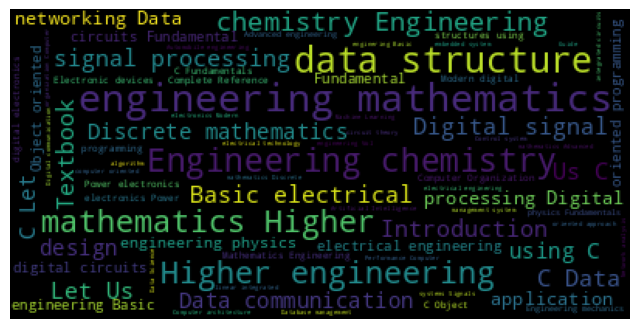

In [ ]:
text = " ".join(merged_df['Title'].tolist())

# create a WordCloud object
wordcloud = WordCloud().generate(text)

# plot the wordcloud
plt.figure(figsize=(8,8), facecolor='white')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
merged_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department,Pages
0,21070122199,Polymer science,V.R. Gowariker,issue,2022-06-18 09:32:01,NaN,1,Civil Engineering,339.0
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,2022-10-31 15:03:30,4.0,2,Mechanical Engineering,946.0
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,2022-11-28 10:03:04,4.0,2,Mechanical Engineering,946.0
3,21070126058,Building drawing : with an integrated approacc...,M.G. Shah,issue,2022-06-17 09:34:54,NaN,1,Civil Engineering,0.0
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,2022-08-06 12:23:06,18.0,3,E and Tc Engineering,543.0
...,...,...,...,...,...,...,...,...,...
5688,T07508,Electronics for you,NaN,issue,2022-07-12 11:00:32,3.0,1,NaN,NaN
5689,T07508,Electronics for you,NaN,issue,2022-07-12 11:00:12,3.0,1,NaN,NaN
5690,N01461,Readers Digest,NaN,issue,2022-08-04 09:20:50,NaN,1,NaN,NaN
5691,N00819,ACI Structural Journal,Frosch Robert J. (ed),issue,2022-11-04 10:23:48,NaN,1,NaN,NaN


In [ ]:
merged_df['IssueDate'] = pd.to_datetime(merged_df['IssueDate'], format='%Y-%m-%d %H:%M:%S').dt.month

In [ ]:
merged_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department,Pages
0,21070122199,Polymer science,V.R. Gowariker,issue,6,NaN,1,Civil Engineering,339.0
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,10,4.0,2,Mechanical Engineering,946.0
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,11,4.0,2,Mechanical Engineering,946.0
3,21070126058,Building drawing : with an integrated approacc...,M.G. Shah,issue,6,NaN,1,Civil Engineering,0.0
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,8,18.0,3,E and Tc Engineering,543.0
...,...,...,...,...,...,...,...,...,...
5688,T07508,Electronics for you,NaN,issue,7,3.0,1,NaN,NaN
5689,T07508,Electronics for you,NaN,issue,7,3.0,1,NaN,NaN
5690,N01461,Readers Digest,NaN,issue,8,NaN,1,NaN,NaN
5691,N00819,ACI Structural Journal,Frosch Robert J. (ed),issue,11,NaN,1,NaN,NaN


In [ ]:
merged_df['IssueDate'].unique()

array([ 6, 10, 11,  8,  1, 12,  7,  9,  2])

In [ ]:
merged_df['Count'].isnull().sum()

534

In [ ]:
merged_df.dropna(inplace= True)

In [ ]:
merged_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department,Pages
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,10,4.0,2,Mechanical Engineering,946.0
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,11,4.0,2,Mechanical Engineering,946.0
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,8,18.0,3,E and Tc Engineering,543.0
5,21070123002,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering,543.0
6,21070123050,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering,543.0
...,...,...,...,...,...,...,...,...,...
5509,20070123028,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering,1019.0
5510,20070123002,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering,1019.0
5643,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",issue,12,2.0,1,Mechanical Engineering,0.0
5644,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",renew,1,2.0,1,Mechanical Engineering,0.0


In [ ]:
df_filtered = merged_df[~merged_df['Pages'].isin([0.0])]
df_filtered

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department,Pages
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,10,4.0,2,Mechanical Engineering,946.0
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,11,4.0,2,Mechanical Engineering,946.0
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,8,18.0,3,E and Tc Engineering,543.0
5,21070123002,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering,543.0
6,21070123050,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering,543.0
...,...,...,...,...,...,...,...,...,...
5226,21070122051,Discrete mathematical structures,"Kolman, Bernard",issue,7,21.0,3,Mathematics,540.0
5227,21070122165,Discrete mathematical structures,"Kolman, Bernard",issue,7,21.0,3,Mathematics,540.0
5228,22070122506,Discrete mathematical structures,"Kolman, Bernard",issue,7,21.0,3,Mathematics,540.0
5509,20070123028,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering,1019.0


In [ ]:
value=0

In [ ]:
zeropages = merged_df[merged_df['Pages'] == value]

In [ ]:
zeropages

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department,Pages
7,21070123050,Electronic devices and circuit theory,Robert boylestad,issue,10,39.0,4,E and Tc Engineering,0.0
8,21070123074,Electronic devices and circuit theory,Robert boylestad,issue,12,39.0,4,E and Tc Engineering,0.0
16,21070122065,Data structures and algorithms,Alfred V. Aho,issue,10,6.0,2,CS/ IT Engineering,0.0
17,22070127055,Engineering mechanics,S. Timoshenko,issue,10,13.0,3,Mechanical Engineering,0.0
18,22070123070,Fundamentals of physics,David Halliday,issue,11,59.0,5,Applied Science,0.0
...,...,...,...,...,...,...,...,...,...
5452,T07598,Big data and analytics,"Acharya, Seema",issue,7,2.0,1,CS/ IT Engineering,0.0
5453,19070122011,Big data and analytics,"Acharya, Seema",issue,8,2.0,1,CS/ IT Engineering,0.0
5643,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",issue,12,2.0,1,Mechanical Engineering,0.0
5644,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",renew,1,2.0,1,Mechanical Engineering,0.0


In [ ]:
#as we don't have enough data for pages, we won't be taking it as a factor

In [ ]:
merged_df.drop('Pages', axis=1, inplace=True)

In [ ]:
merged_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,10,4.0,2,Mechanical Engineering
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,11,4.0,2,Mechanical Engineering
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,8,18.0,3,E and Tc Engineering
5,21070123002,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering
6,21070123050,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering
...,...,...,...,...,...,...,...,...
5509,20070123028,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering
5510,20070123002,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering
5643,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",issue,12,2.0,1,Mechanical Engineering
5644,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",renew,1,2.0,1,Mechanical Engineering


### Label Encoding Features

In [ ]:
merged_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,10,4.0,2,Mechanical Engineering
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,11,4.0,2,Mechanical Engineering
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,8,18.0,3,E and Tc Engineering
5,21070123002,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering
6,21070123050,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering
...,...,...,...,...,...,...,...,...
5509,20070123028,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering
5510,20070123002,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering
5643,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",issue,12,2.0,1,Mechanical Engineering
5644,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",renew,1,2.0,1,Mechanical Engineering


In [ ]:
merged_df['Title'].nunique()

544

In [ ]:
new_df= merged_df

In [ ]:
new_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department
1,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,issue,10,4.0,2,Mechanical Engineering
2,21070125044,Thermodynamics an engineering approach,Yunus A. Cengel,renew,11,4.0,2,Mechanical Engineering
4,20070123016,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,8,18.0,3,E and Tc Engineering
5,21070123002,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering
6,21070123050,Op-Ams and linear integrated circuits,Ramakant A. Gayakwad,issue,1,18.0,3,E and Tc Engineering
...,...,...,...,...,...,...,...,...
5509,20070123028,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering
5510,20070123002,Digital Image Processing,"Gonzalez, Rafael C.",issue,1,3.0,1,E and Tc Engineering
5643,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",issue,12,2.0,1,Mechanical Engineering
5644,22070123123,CAD/CAM/CIM,"Radhakrishnan, P.",renew,1,2.0,1,Mechanical Engineering


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
new_df['Department'] = le.fit_transform(new_df['Department'])

In [ ]:
new_df['type'] = le.fit_transform(new_df['type'])

In [ ]:
new_df['Author'] = le.fit_transform(new_df['Author'])

In [ ]:
new_df['Title'] = le.fit_transform(new_df['Author'])

In [ ]:
new_df.dtypes

Cardnumber     object
Title           int64
Author          int64
type            int64
IssueDate       int64
Count         float64
Rating          int64
Department      int64
dtype: object

In [ ]:
new_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department
1,21070125044,573,573,0,10,4.0,2,10
2,21070125044,573,573,1,11,4.0,2,10
4,20070123016,427,427,0,8,18.0,3,3
5,21070123002,427,427,0,1,18.0,3,3
6,21070123050,427,427,0,1,18.0,3,3
...,...,...,...,...,...,...,...,...
5509,20070123028,202,202,0,1,3.0,1,3
5510,20070123002,202,202,0,1,3.0,1,3
5643,22070123123,419,419,0,12,2.0,1,10
5644,22070123123,419,419,1,1,2.0,1,10


In [ ]:
new_df['Count'] = new_df['Count'].astype(int)

In [ ]:
new_df

,Cardnumber,Title,Author,type,IssueDate,Count,Rating,Department
1,21070125044,573,573,0,10,4,2,10
2,21070125044,573,573,1,11,4,2,10
4,20070123016,427,427,0,8,18,3,3
5,21070123002,427,427,0,1,18,3,3
6,21070123050,427,427,0,1,18,3,3
...,...,...,...,...,...,...,...,...
5509,20070123028,202,202,0,1,3,1,3
5510,20070123002,202,202,0,1,3,1,3
5643,22070123123,419,419,0,12,2,1,10
5644,22070123123,419,419,1,1,2,1,10


In [ ]:
new_df["Rating"].unique()

array([2, 3, 4, 1, 5])

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd


# select the relevant features and target variable
X = new_df[["Count", "IssueDate", "Department", "type"]]
y = new_df["Rating"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a Ridge regression model with L2 regularization
model = Ridge(alpha=1.0)

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.9035437554851852


### Decision tree  

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# select the relevant features and target variable
X = new_df[["Count", "IssueDate", "Department", "type"]]
y = new_df["Rating"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=10)

# use cross-validation to evaluate the model's performance
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Cross-validation Mean Squared Error:", -scores.mean())
print("Testing Mean Squared Error:", mse)


Cross-validation Mean Squared Error: -0.0
Testing Mean Squared Error: 0.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# select the relevant features and target variable
X = new_df[["Count", "IssueDate", "Department", "type"]]
y = new_df["Rating"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a Decision Tree Regressor model
tree = DecisionTreeRegressor(random_state=42)

# define the hyperparameter grid
param_grid = {'max_depth': [5, 10, 15, 20]}

# create a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring="neg_mean_squared_error")

# fit the grid search object to the training data
grid.fit(X_train, y_train)

# get the best estimator and print the best parameters
best_estimator = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# create a Ridge Regression model with L2 regularization
ridge = Ridge(alpha=0.1)


# fit the Ridge Regression model to the training data
ridge.fit(X_train, y_train)

# make predictions on the testing data using the best estimator and the Ridge Regression model
y_pred1 = best_estimator.predict(X_test)
y_pred2 = ridge.predict(X_test)

# compute the mean squared error for both models
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

print("Decision Tree Mean Squared Error:", mse1)
print("Ridge Regression Mean Squared Error:", mse2)


Best Parameters: {'max_depth': 5}
Decision Tree Mean Squared Error: 0.0
Ridge Regression Mean Squared Error: 0.903549191633371


### Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X = new_df[["Count","IssueDate","Department","type"]]
y = new_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

ridge_model = Ridge(alpha=grid_search.best_params_['alpha'])
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Ridge Regression Mean Squared Error:", mse)


Best Parameters: {'alpha': 10}
Ridge Regression Mean Squared Error: 0.9034907941569645


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = new_df[["Count","IssueDate","Department","type"]]
y = new_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Mean Squared Error:", mse)


Random Forest Mean Squared Error: 0.0


### SVM


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Preprocess the data
X = new_df[["Count", "IssueDate", "Department", "type"]]
y = new_df['Rating']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
svr = SVR()

# Define the parameter grid to search over
param_grid = {'kernel': ['linear', 'rbf', 'poly'],
              'C': [0.1, 1, 10],
              'epsilon': [0.01, 0.1, 1]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Fit the model using the best hyperparameters
svr_model = SVR(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], epsilon=grid_search.best_params_['epsilon'])
svr_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = svr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Support Vector Regression Mean Squared Error:", mse)


Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Support Vector Regression Mean Squared Error: 0.09286808078481641


### Neural networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

X = new_df[["Count","IssueDate","Department","type"]]
y = new_df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation=None))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Neural Network R-squared Score:", r2)
print("Neural Network Mean Squared Error:", mse)


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


39/39 [==============================] - 0s 2ms/step
Neural Network R-squared Score: 0.9026055308781396
Neural Network Mean Squared Error: 0.20118463254317503


In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_modal=pickle.load(open("trained_model.sav", "rb"))

AttributeError: ignored

In [ ]:
import pickle

# save the model to disk
filename = 'neural_network_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)


AttributeError: ignored

In [ ]:
!pip install tensorflow==2.11.0
>>> import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-serve